**AUTOMATIC LICENSE NUMBER PLATE RECOGNITION**


---
Automatic License Number Plate Recognition (**ALNPR**)is the ability to automatically recognize the symbols contained in the number plates of a motor vehicle when read from an image provided by video surveillance cameras for the purposes of further processing by a security system.

Advantages

*   Improves Road Safety
*   Reduces Crime
*   Provides Better Information
*   Parking Management









1. **OpenCV** is a cross-platform library using which we can develop real-time 
computer vision applications. It mainly focuses on image processing, video capture and analysis including features like face detection and object detection.  

2. **NumPy** is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays. 

3. **Matplotlib** is a plotting library for the Python programming language and its numerical mathematics extension NumPy. It provides an object-oriented API for embedding plots into applications using general-purpose GUI toolkits like Tkinter, wxPython, Qt, or GTK.

4. **Python-tesseract** is an optical character recognition (OCR) tool for python. That is, it will recognize and “read” the text embedded in images.


**Installing... required Modules**

In [1]:
!pip install opencv-python
!pip install pytesseract

  Created wheel for pytesseract: filename=pytesseract-0.3.8-py2.py3-none-any.whl size=14071 sha256=02c45ca4b3c1b138549529367610fca4de913d793913cc0e35f65d6758d4c2ea
  Stored in directory: /root/.cache/pip/wheels/a2/66/45/88bf1b2d428817a006944b9730b27d6861b776e05a9e262bd4
Successfully built pytesseract


In [2]:
!sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 39 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 2s (3,047 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl

In [3]:
try:
 from PIL import Image
except ImportError:
 import Image

 **Importing required Modules...**


In [4]:
from matplotlib import pyplot as plt
import numpy as np
import cv2
import pytesseract 
from pytesseract import image_to_string
from google.colab import files
from google.colab.patches import cv2_imshow

In [5]:
pytesseract.pytesseract.tesseract_cmd = (
    r'/usr/bin/tesseract'
)

**Uploading Images...**


In [6]:
uploaded = files.upload()

Saving car3.jpg to car3.jpg


**Reading as Gray image...**

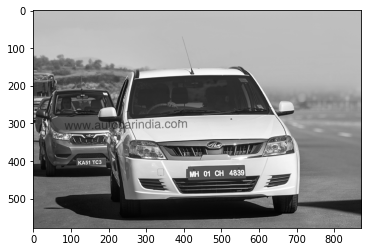

In [7]:
img = cv2.imread('car3.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

**Defining function which are declared in main function...**

In [8]:
#Defining ratio check

def ratioCheck(area, width, height):
    ratio = float(width) / float(height)
    if ratio < 1:
        ratio = 1 / ratio
    if (area < 1063.62 or area > 73862.5) or (ratio < 3 or ratio > 6):
        return False
    return True

#Defining ratio and rotation 

def ratio_and_rotation(rect):
    (x, y), (width, height), rect_angle = rect
    if(width>height):
        angle = -rect_angle
    else:
        angle = 90 + rect_angle
    if angle>15:
         return False
    if height == 0 or width == 0:
        return False
    area = height*width
    if not ratioCheck(area,width,height):
        return False
    else:
        return True

In [9]:
def isMaxWhite(plate):
    avg = np.mean(plate)
    if(avg>=115):
        return True
    else:
         return False

def clean2_plate(plate):
    gray_img = cv2.cvtColor(plate, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray_img, 110, 255, cv2.THRESH_BINARY)
    if cv2.waitKey(0) & 0xff == ord('q'):
        pass
    num_contours,hierarchy = cv2.findContours(thresh.copy(),cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    if num_contours:
        contour_area = [cv2.contourArea(c) for c in num_contours]
        max_cntr_index = np.argmax(contour_area)
        max_cnt = num_contours[max_cntr_index]
        max_cntArea = contour_area[max_cntr_index]
        x,y,w,h = cv2.boundingRect(max_cnt)
        if not ratioCheck(max_cntArea,w,h):
            return plate,None
        final_img = thresh[y:y+h, x:x+w]
        return final_img,[x,y,w,h]
    else:
        return plate, None

**Main function & Printing Result...**

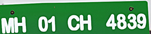

NUMBER PLATE : ve esc)



NUMBER PLATE : a4 Vy a nox



In [10]:
img = cv2.imread("car3.jpg")
img2 = cv2.GaussianBlur(img, (3,3), 0)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
img2 = cv2.Sobel(img2,cv2.CV_8U,1,0,ksize=3)    
_,img2 = cv2.threshold(img2,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
element = cv2.getStructuringElement(shape=cv2.MORPH_RECT, ksize=(17, 3))
morph_img_threshold = img2.copy()
cv2.morphologyEx(src=img2, op=cv2.MORPH_CLOSE, kernel=element, dst=morph_img_threshold)
num_contours, hierarchy= cv2.findContours(morph_img_threshold,mode=cv2.RETR_EXTERNAL,method=cv2.CHAIN_APPROX_NONE)
cv2.drawContours(img2, num_contours, -1, (0,255,0), 1)
for i,cnt in enumerate(num_contours):
    min_rect = cv2.minAreaRect(cnt)
    if ratio_and_rotation(min_rect):
        x,y,w,h = cv2.boundingRect(cnt)
        plate_img = img[y:y+h,x:x+w]
        if (isMaxWhite(plate_img)):
            clean_plate, rect = clean2_plate(plate_img)
            if rect:
                fg=0
                x1,y1,w1,h1 = rect
                x,y,w,h = x+x1,y+y1,w1,h1
                final_img = img[y:y+h,x:x+w]
                print("Number  identified number plate...")
                cv2_imshow(final_img)
                data = pytesseract.image_to_string(final_img, lang='eng', config='--psm 7')
                print('NUMBER PLATE :' , data)
        else :
          cv2_imshow(plate_img)
          data = pytesseract.image_to_string(plate_img, lang='eng', config='--psm 7')
          print('NUMBER PLATE :' , data)

**THANK YOU**